In [1]:
from __future__ import print_function
%matplotlib inline
import os 
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
#import pandas_profiling
plt.style.use('ggplot')
warnings.simplefilter('ignore')


In [2]:
plt.rcParams['figure.figsize'] = (12,8)

# Exploratory Data Analysis

In [3]:
hr = pd.read_csv(r'C:\Users\KIIT\Desktop\employee.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Run Below cell for detailed project report 

In [4]:
#import pandas_profiling
#from pandas_profiling import ProfileReport #Detailed report of the data set
#prof = ProfileReport(hr) 
#prof

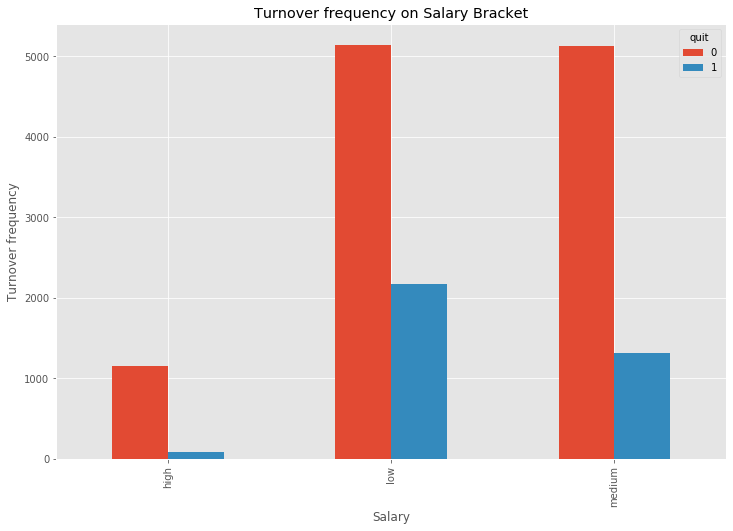

In [5]:
# Plotting employees of different salary groups with quitting statistics

pd.crosstab(hr.salary, hr.quit).plot(kind = 'bar')
plt.title("Turnover frequency on Salary Bracket")
plt.xlabel('Salary')
plt.ylabel('Turnover frequency')
plt.show()

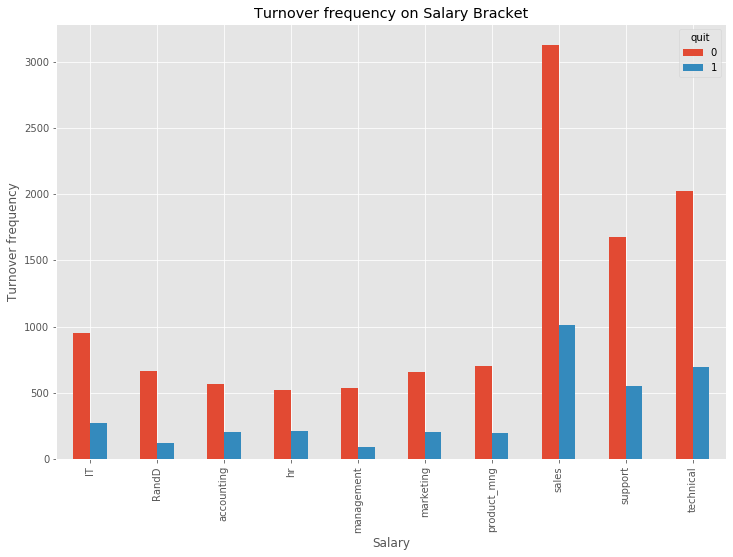

In [6]:
pd.crosstab(hr.department, hr.quit).plot(kind = 'bar')
plt.title("Turnover frequency on Salary Bracket")
plt.xlabel('Salary')
plt.ylabel('Turnover frequency')
plt.show()

# Encode categorical features

In [7]:
# adding high_sal, low_sal, med_sal and all distinct departments as coloumns. employee belonging to sales departments 
# will be depicted as value =1 under sales and value=0 under all other departments. 

cat_vars =['department', 'salary']
for var in cat_vars:
    cat_list= pd.get_dummies(hr[var], prefix= var)
    hr = hr.join(cat_list)

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [9]:
hr.drop(columns =['department', 'salary'], axis =1, inplace = True) #axis=1 cause we are deleting rows, vertical axis

# Visualize class imbalance

In [10]:
from yellowbrick.target import ClassBalance
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

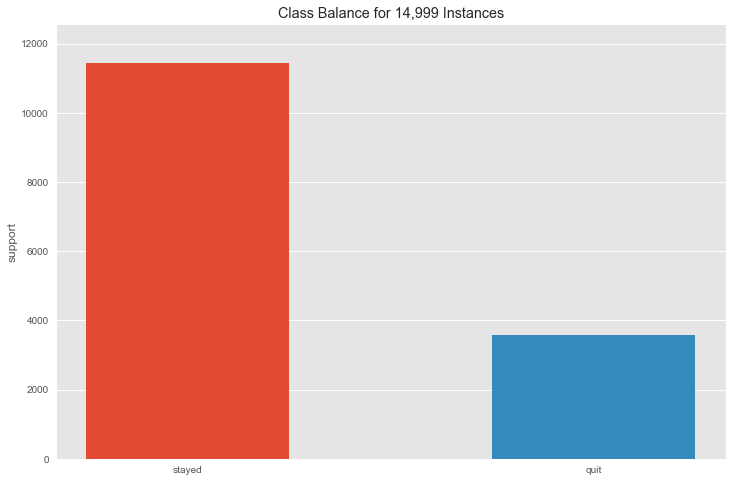

In [11]:
visualizer =  ClassBalance(labels= ['stayed', 'quit']).fit(hr.quit) #creating a visualizer and fitting it to our target varriable
visualizer.show()

There is a class imbalance problem as there are more number of employees that stayed within the company than the ones who quit

# Create training and test set

In [12]:
# creating our feature matrix and target vector

X = hr.loc[:, hr.columns != 'quit'] # hr.loc/ selecting all rows that are not our target coloumn, quit col.
y = hr.quit                         # Target vector


In [13]:
from sklearn.model_selection import train_test_split                               #stratified sampling split strategy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size =0.2, stratify =y ) #stratifying y 

# Builiding a decision tree classifier with Interactive controls

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz #display a tree within a jupyter notebook
from IPython.display import SVG
#from graphviz import Source
from IPython.display import display
from ipywidgets import interactive , IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [15]:
from graphviz import Source

In [16]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:\Users\KIIT\Anaconda3\Lib\site-packages\graphviz-0.14.1.dist-info'

In [29]:
@interact
def plot_tree(crit= ['gini', 'entropy'],
             split =['best','random'],
             depth = IntSlider(min= 1, max= 30, value= 2, continuous_update=False),
             min_split = IntSlider(min= 2, max= 5, value= 2, continuous_update= False),
             min_leaf =IntSlider(min= 1, max= 5, value= 2, continuous_update= False)):
    estimator = DecisionTreeClassifier(random_state =0,
                                      criterion = crit,
                                      splitter =split,
                                      max_depth = depth,
                                      min_samples_split = min_split,
                                      min_samples_leaf = min_leaf)
    estimator.fit(X_train, y_train)
    print('Decision Tree Training Accuracy {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Decision Tree Testing Accuracy {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    
    graph = Source(tree.export_graphviz(estimator, out_file = None,
                                       feature_names = X_train.columns,
                                       class_names = ['stayed','quit'],
                                       filled =True))
    display(Image(data = graph.pipe(format ='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Build an Interactive Random forest classifier

although randomization increases bias, it is possible to get a reduction in varience of the ensemble.
Random forests are the most robust ML algotithm for a variety of reasons :
1. randomization and avereraging lead to reduction in varience and improve accuracy.
2. the implementations are parellizable
3. memory consumption and training time can be reduced by bootstrapping
4. sampling features as well as sampling examples are curcial to improving acuracy.

In [28]:
@interact
def plot_tree_rf(crit= ['gini', 'entropy'],
                 bootstrap =['True','False'],
                 depth = IntSlider(min= 1, max= 30, value= 2, continuous_update=False),
                 forests = IntSlider(min= 1, max=200, value=100, continuous_update= False),
                 min_split = IntSlider(min= 2, max= 5, value= 2, continuous_update= False),
                 min_leaf =IntSlider(min= 1, max= 5, value= 2, continuous_update= False)):
    
    estimator = RandomForestClassifier(random_state=1,
                                      criterion= crit,
                                      bootstrap= bootstrap,
                                      n_estimators = forests,
                                      max_depth = depth,
                                      min_samples_split = min_split,
                                      min_samples_leaf = min_leaf,
                                      n_jobs = -1,
                                      verbose = False)
    estimator.fit(X_train, y_train)
    
    print('Random Forests Training Accuracy {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forests Testing Accuracy {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    
    num_tree= estimator.estimators_[0]      #selecting first tree
    print('\Visualizing Tree :', 0)
    
    graph = Source(tree.export_graphviz(num_tree, out_file = None,
                                       feature_names = X_train.columns,
                                       class_names = ['stayed','quit'],
                                       filled =True))                   # Graph for random forest does not take estimator as
    display(Image(data = graph.pipe(format ='png')))                    #  input. 
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

#  Feature Importance and evaluation metrics

In [30]:
from yellowbrick.model_selection import FeatureImportances
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

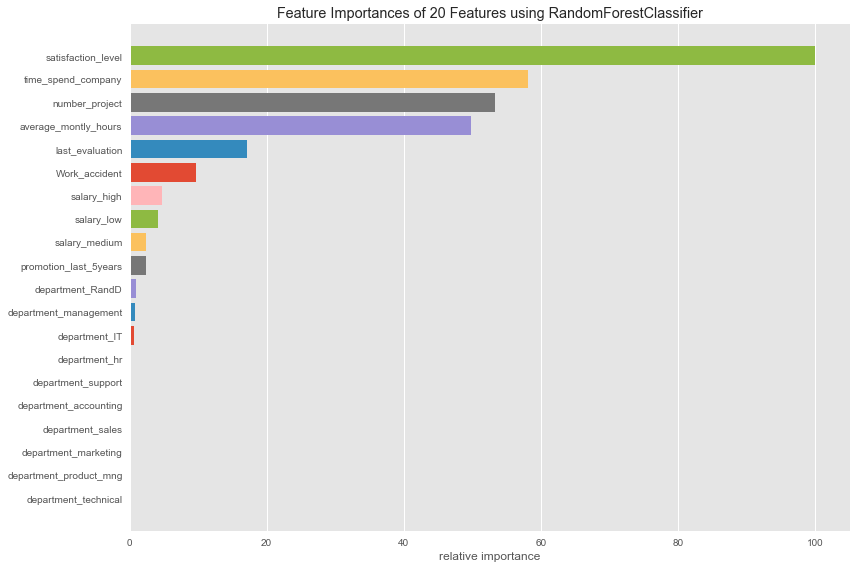

In [31]:
# Realtive importance of all the features

# creating a random forest estimator rf, just copy the estimator returned by random forest.

rf =RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1,
                       verbose=False, warm_start=False)

viz = FeatureImportances(rf)                                     # visualizer
viz.fit(X_train, y_train)
viz.show()                  

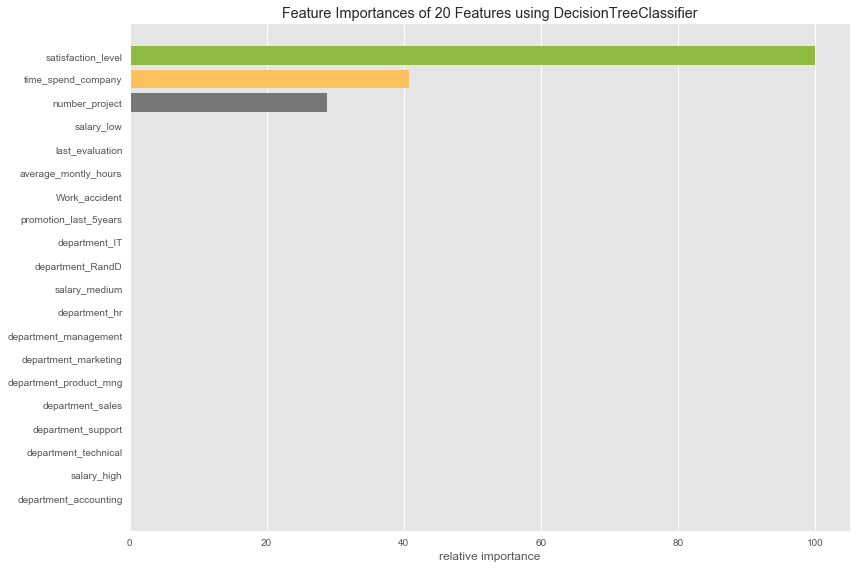

In [34]:
# Realtive importance of all the features

# creating a decision tree estimator dt, just copy the estimator returned by decision tree.

dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

viz = FeatureImportances(dt)                                     # visualizer
viz.fit(X_train, y_train)                                         
viz.show()                     

# # from the data above, we can see that the decision trees and random forests dont weigh the same features. 

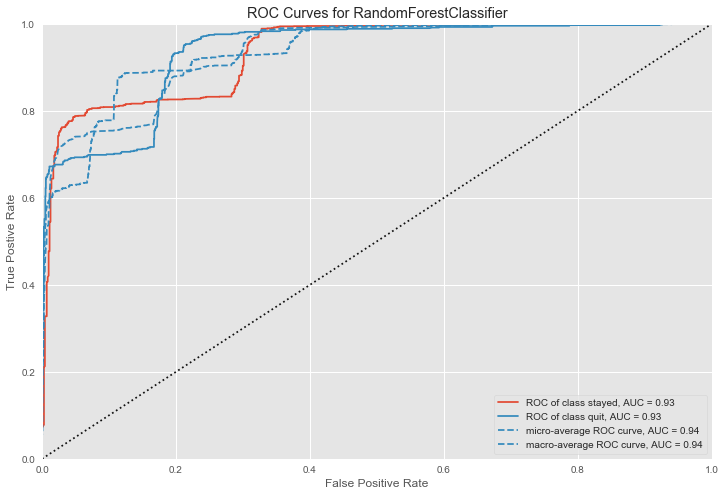

In [35]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf, classes=['stayed','quit'])    # instantiating the visualizer

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)
visualizer.poof()

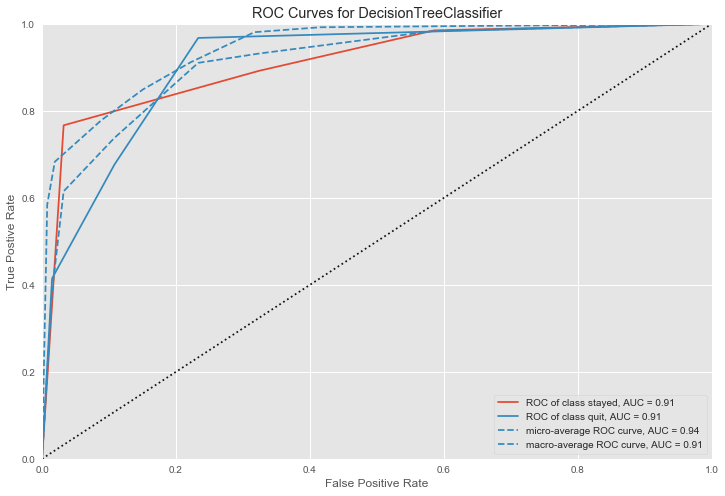

In [36]:
visualizer = ROCAUC(dt, classes=['stayed','quit'])    # instantiating the visualizer

visualizer.fit(X_train, y_train)

visualizer.score(X_test, y_test)
visualizer.poof()